In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.ndimage import gaussian_filter1d

In [2]:
shift_range = 50 # for now, we shift all peaks independently
variation_range = 0.05 # +/- of absolute height for each peak
kernel_range = (2, 3) # min and max for guassian kernel sizes
datapoints = 5000

In [3]:
with open('data_configs/data_500.json', 'r') as file:
    config = json.load(file)

In [4]:
rng = np.random.default_rng(2023)

In [5]:
def get_variation(peak_positions, peak_heights):
    pos = np.array(peak_positions)
    hi = np.array(peak_heights)
    new_peaks = np.clip(np.array([rng.integers(f-shift_range, f+shift_range) for f in pos]), 0, 4999)
    # apply height variation and clip peaks smaller 0
    new_heights = np.clip(np.array([rng.uniform(f-variation_range, f+variation_range) for f in hi]), 0, 2)
    scan = np.zeros(datapoints)
    scan[new_peaks] = new_heights
    scan = gaussian_filter1d(scan, 2, mode='constant')
    return scan

In [6]:
scan0 = np.zeros(datapoints)
scan0[config['spectra']['0']['peak_positions']] = config['spectra']['0']['peak_heights']
scan0 = gaussian_filter1d(scan0, 2, mode='constant')
scan1 = np.zeros(datapoints)
scan1[config['spectra']['1']['peak_positions']] = config['spectra']['1']['peak_heights']
scan1 = gaussian_filter1d(scan1, 2, mode='constant')

In [7]:
plt.rcParams.update({'font.size': 14})

In [8]:
var1 = get_variation(config['spectra']['0']['peak_positions'], config['spectra']['0']['peak_heights'])
var2 = get_variation(config['spectra']['0']['peak_positions'], config['spectra']['0']['peak_heights'])

In [9]:
var_train_pos = rng.integers(500, 600, 50, endpoint=True)
var_train_hi = rng.uniform(0.05, 0.15, 50)+.04
var_val_pos = rng.integers(500, 600, 10, endpoint=True)
var_val_hi = rng.uniform(0.05, 0.15, 10)+.04
test_pos = np.repeat(np.array([525, 550, 575]), 3)
test_hi = np.tile(np.array([0.08, 0.1, 0.12]), 3)+.04

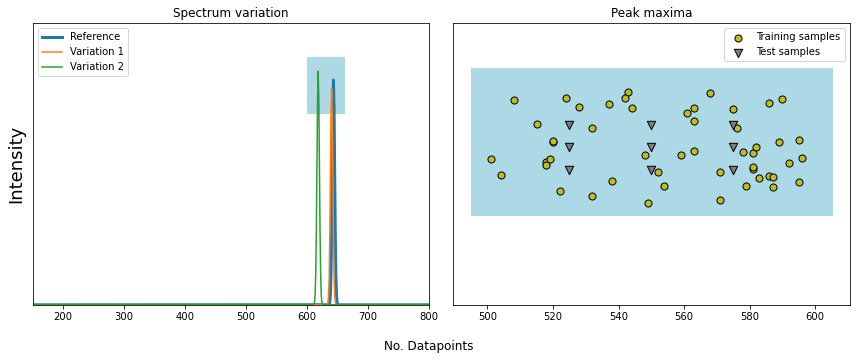

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
ax[0].fill([600, 600, 660, 660], [0.17, 0.22, 0.22, 0.17], alpha=1, color='lightblue')#, label='enlarged area')
ax[0].plot(scan0, lw=3, label='Reference')
ax[0].plot(var1, label='Variation 1')
ax[0].plot(var2, label='Variation 2')
#h, l = ax[0].get_legend_handles_labels()
#h.append(h.pop(0))
#l.append(l.pop(0))
ax[1].fill([495, 495, 605, 605], [0.08, 0.21, 0.21, 0.08], alpha=1, color='lightblue')
ax[1].scatter(var_train_pos, var_train_hi, marker='o', s=50, edgecolors='black', c='C8',label='Training samples')
#ax[1].scatter(var_val_pos, var_val_hi, marker='x', label='validation samples')
ax[1].scatter(test_pos, test_hi, marker='v', s=70, edgecolors='black', c='C7', label='Test samples')
ax[0].set_xlim(150,800)#1150)
ax[0].set_ylim(-0.01,0.25)
ax[1].set_ylim(0.,0.25)
ax[0].legend()#(h, l)
ax[1].legend()
#ax[0].set_xticks([])
#ax[1].set_xticks([])
ax[0].set_yticks([])
ax[0].set_ylabel('Intensity', fontsize=18)
ax[0].set_title('Spectrum variation')
ax[1].set_title('Peak maxima')
#fig.supylabel('Intensity')
fig.supxlabel('No. Datapoints')
#fig.suptitle('Inner-Class variation for benchmark set')
fig.tight_layout()
plt.savefig('results/class_variation.png', dpi=300, bbox_inches='tight')
plt.show()